In [15]:
from sklearn.datasets import make_blobs
import numpy as np

nb_samples=1000
nb_unlabled=750

X,Y=make_blobs(n_samples=nb_samples,n_features=2,centers=2,cluster_std=2.5,random_state=40)

#tworzymy dane bez etykiet
unlabled_idx=np.random.choice(np.arange(0,nb_samples,1),replace=False,size=nb_unlabled)
Y[unlabled_idx]=-1

Definijuemy rozkłady Guassa poprzez określenie ich średniej kowariancji oraz wagi (macierze kowariancji muszą być dodatnio półokreślone)

In [16]:
#pierwszy rozkład
m1=np.array([-3.0,-4.5])
c1=np.array([[25.0,5.0],[5.0,35.0]])
q1=0.5

#drugi rozkład
m2=np.array([5.0,10.0])
c2=np.array([[25.0,-10.0],[-10.0,25.0]])
q2=0.5 #waga

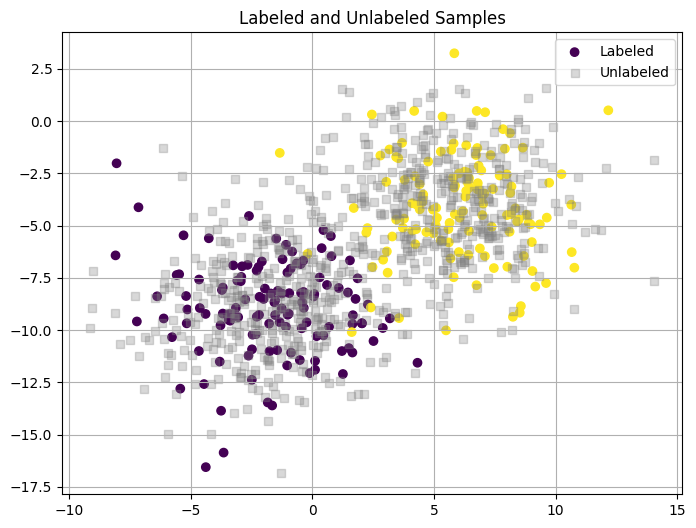

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot labeled samples
plt.scatter(X[Y != -1][:, 0], X[Y != -1][:, 1], c=Y[Y != -1], cmap='viridis', label='Labeled')

# Plot unlabeled samples
plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], c='grey', alpha=0.3,marker='s', label='Unlabeled')

plt.title('Labeled and Unlabeled Samples')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
import numpy as np
from scipy.stats import multivariate_normal

nb_iterations = 5

for _ in range(nb_iterations):
    Pij = np.zeros((nb_samples, 2))

    for i in range(nb_samples):
        if Y[i] == -1:  # for unlabeled data
            p1 = multivariate_normal.pdf(X[i], m1, c1, allow_singular=True) * q1
            p2 = multivariate_normal.pdf(X[i], m2, c2, allow_singular=True) * q2
            
            # Check if denominator is zero to avoid division by zero
            if p1 + p2 != 0:
                Pij[i] = [p1, p2] / (p1 + p2)
            else:
                # Handle the case when the denominator is zero
                # For example, you can assign equal probabilities if the denominator is zero
                Pij[i] = [0.5, 0.5]

        else:
            Pij[i, :] = [1.0, 0.0] if Y[i] == 0 else [0.0, 1.0]

    n = np.sum(Pij, axis=0)
    m = np.sum(np.dot(Pij.T, X), axis=0)
    m1 = np.dot(Pij[:, 0], X) / n[0]
    m2 = np.dot(Pij[:, 1], X) / n[1]
    q1 = n[0] / float(nb_samples)
    q2 = n[1] / float(nb_samples)
    c1 = np.zeros((2, 2))
    c2 = np.zeros((2, 2))

    for t in range(nb_samples):
        c1 += Pij[t, 0] * np.outer(X[t] - m1, X[t] - m1)
        c2 += Pij[t, 1] * np.outer(X[t] - m2, X[t] - m2)
    
    # Check if covariance matrices are valid before dividing
    if n[0] != 0:
        c1 /= n[0]
    if n[1] != 0:
        c2 /= n[1]

    # Handle potential NaN values resulting from invalid calculations
    c1 = np.nan_to_num(c1)
    c2 = np.nan_to_num(c2)


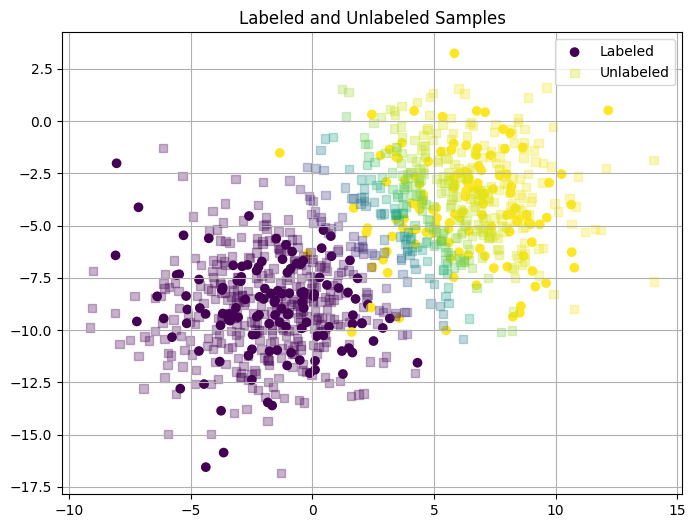

In [19]:
# Plot labeled and unlabeled samples
plt.figure(figsize=(8, 6))

# Plot labeled samples
plt.scatter(X[Y != -1][:, 0], X[Y != -1][:, 1], c=Y[Y != -1], cmap='viridis', label='Labeled')

# Plot unlabeled samples
plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], c=Pij[Y == -1][:, 1], cmap='viridis', alpha=0.3, marker='s', label='Unlabeled')

plt.title('Labeled and Unlabeled Samples')
plt.legend()
plt.grid(True)
plt.show()